In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from LinearRegression import LinearRegression

data=pd.read_csv("Medical Price Dataset.csv")

In [2]:
data.head()#it print the 1st five values of data stored in data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.describe()#it describe the data stored in train like count,mean etc

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
data.isnull().sum() #this will provide the information of sum of number of null values in each coloumn

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

so data has no Nan values 
next is checking for categorical data and converting to int type.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


so there are 4 object types , we will convert to int or float.
1st is sex coloumn

In [6]:
data['sex'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1338 entries, 0 to 1337
Series name: sex
Non-Null Count  Dtype 
--------------  ----- 
1338 non-null   object
dtypes: object(1)
memory usage: 10.6+ KB


In [7]:
data['sex'].unique() # it provides information about unique valus in the coloumn

array(['female', 'male'], dtype=object)

In [8]:
Sex_dict={"female":0,"male":1} # here  dictionry which is like map of cpp, is described 
data["sex"]=data["sex"].map(Sex_dict) #sex coloumn values are mapped with dictionary and female will now become 0,male will be 1
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [9]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [10]:
Smoker_dict={"no":0,"yes":1} # same thng is done with smoker coloumn ; values are mapped in dataset
data["smoker"]=data["smoker"].map(Smoker_dict)
data['smoker'].head()

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int64

In [11]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [12]:
data['region'].describe()

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object

In [13]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

so now we will map all 4 region with 0,1,2,3 respectively to ans above

In [14]:
region_dict={"southwest":0,"southeast":1,"northwest":2,"northeast":3} # same thng is done with region coloumn ; values are mapped in dataset
data["region"]=data["region"].map(region_dict)
data['region'].head()

0    0
1    1
2    1
3    2
4    2
Name: region, dtype: int64

In [15]:
data.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
5,31,0,25.740,0,0,1,3756.62160
6,46,0,33.440,1,0,1,8240.58960
7,37,0,27.740,3,0,2,7281.50560
8,37,1,29.830,2,0,3,6406.41070
9,60,0,25.840,0,0,2,28923.13692


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [17]:
data['age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1338 entries, 0 to 1337
Series name: age
Non-Null Count  Dtype
--------------  -----
1338 non-null   int64
dtypes: int64(1)
memory usage: 10.6 KB


In [18]:
data['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [19]:
data['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [20]:
age_range = [0, 11, 20, 30, 40, 50, 60, 70, float('inf')] #here age range is taken
age_range_dict = [0, 1, 2, 3, 4, 5, 6, 7] # wrt to age range the dictionary of mapping values are defined

# now we will have bins described in age range in which value between 0,10 are mapped with 1, here right=False means rightmost value is not included in range
# and Include_lowest=true means lowest value of range sholud be part of range wrt to defined mapping
data['age'] = pd.cut(data['age'], bins=age_range, labels=age_range_dict, right=False, include_lowest=True).astype(int)
data['age'].head(30)

0     1
1     1
2     2
3     3
4     3
5     3
6     4
7     3
8     3
9     6
10    2
11    6
12    2
13    5
14    2
15    1
16    5
17    2
18    5
19    3
20    6
21    3
22    1
23    3
24    3
25    5
26    6
27    5
28    2
29    3
Name: age, dtype: int32

In [21]:
data['bmi'].unique()

array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

In [22]:
data['bmi']=data['bmi'].astype(int)# this is used to convert te datatype to int

In [23]:
data['bmi'].isnull().sum()

0

In [24]:
data['bmi'].head(30) #this will print 1st thirty values from data

0     27
1     33
2     33
3     22
4     28
5     25
6     33
7     27
8     29
9     25
10    26
11    26
12    34
13    39
14    42
15    24
16    30
17    23
18    40
19    35
20    36
21    32
22    34
23    31
24    28
25    27
26    23
27    32
28    17
29    36
Name: bmi, dtype: int32

In [25]:
bmi_range = [ 10,15,20, 25,30, 35, 40, 45, 50,55 ,float('inf')] #here bmi range is taken
bmi_range_dict = [0, 1, 2, 3, 4, 5, 6, 7,8,9] # wrt to bmi range the dictionary of mapping values are defined

# now we will have bins described in bmi range in which value between 0,10 are mapped with 1, here right=False means rightmost value is not included in range
# and Include_lowest=true means lowest value of range sholud be part of range wrt to defined mapping
data['bmi'] = pd.cut(data['bmi'], bins=bmi_range, labels=bmi_range_dict, right=False, include_lowest=True).astype(int)
data['bmi'].head(30)

0     3
1     4
2     4
3     2
4     3
5     3
6     4
7     3
8     3
9     3
10    3
11    3
12    4
13    5
14    6
15    2
16    4
17    2
18    6
19    5
20    5
21    4
22    4
23    4
24    3
25    3
26    2
27    4
28    1
29    5
Name: bmi, dtype: int32

In [26]:
data['bmi'].isnull().sum()

0

In [27]:
data.columns.values # it will print the names of coloumns in data

array(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'],
      dtype=object)

here test,train data is splitted , here 20 % is test data and 80% is training data

In [28]:
ratio=0.80 # here ratio is initialized
n_rows=data.shape[0] # now no. o rows in datset is calculated
train_size=int(n_rows*ratio) # here 80% of dataset is calculated
train=data[0:train_size] # starting from 0 to train_size, the data will be training data
test=data[train_size:] # and rest 20% is test data

In [29]:

X_train=train.iloc[:,[0,1,2,3,4,5]].values  #now test ,train defination is done like train_test split is done. here coloumn having index 0,1,2,3,5 a
                                                 #are part of X_train model i.e. values in these coloumn will be the features for governing the result
y_train=train.iloc[:,6].values # valuesin cloumn 0 is y_train i.e. output for fatures in X_train
X_test=test.iloc[:,[0,1,2,3,4,5]].values  # here values prescribed will be used to calculate the result
y_test=test.iloc[:,6].values # these will be used for comparison


In [30]:

def mean_squared_error(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2   

   

regressor = LinearRegression(learning_rate=0.06, n_iters=1000) #here we called the linearregression algorithm where learning arte=0.06,iterations are 1000 is sent
regressor.fit(X_train, y_train)#here we called the function fit which will be used like training the model i.e. these values will help in providing the answers for X_test feaures
predictions = regressor.predict(X_test)# here predict function is called and X_test values are passed for classification
print("predictions",predictions)# final values are printed

mse = mean_squared_error(y_test, predictions) #here mean square error are calculated using mean_squared_error function
print("MSE:", mse) # final value are printed

accu = r2_score(y_test, predictions) # this is to calculate the frequency
print("Accuracy:", accu) # final value are printed



predictions [32644.03630525 14990.16296302  5048.57892345 12238.02279304
 10522.52291932  6243.99578503  9854.97484406  3826.25568317
 28203.30264026 15544.62295818   -60.01798666  6270.7445788
  3052.17656915  7106.10705454 15849.00185208 27951.32685785
 10992.22313944 12214.54637972 17098.23147106  8222.05684098
 34589.89828259 11352.43511021  5603.03891861 28950.47537557
 13572.01218707  5178.27120568 37388.99127921  4661.61815891
 12961.71911503  5464.62397109 27783.82762723 11159.72237006
  6713.69600515 13436.86962     5054.0292083  12187.79758594
  8576.81852691 11851.0620285   4717.45123578  7548.74331102
 13404.51295645 33529.62398808 33059.92376796  5127.88841365
  2216.97167835 12270.37945659 10817.53652777 29088.89032309
 32644.03630525  4297.97622276 28176.55384648 11933.80148407
 39054.10836091  6238.54550018 32998.79799118 13354.13016442
  9831.34084581  9905.35763609  7106.10705454 -2581.63846809
  6405.88714587  9988.09709167 15820.07515391  7746.90633602
  5048.578923

now using coorelation between features

<Axes: >

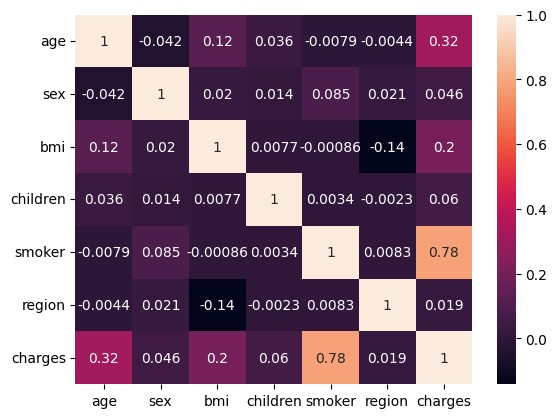

In [31]:
 
%matplotlib inline 
import seaborn as sns 
corr = train.corr()    
sns.heatmap(corr, annot=True) # this is to draw heatmap which is used to tell correlation among features and labels; basically it 
                              #gives info for e.g. which features for label has more weight or more important for the decision and 
                              # also we can remove unwanted/less affecting features  

In [32]:
data.columns.values

array(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'],
      dtype=object)

In [33]:
X_train=train.iloc[:,[0,2,4]].values  #here most _co related data is taken in account
y_train=train.iloc[:,6].values
X_test=test.iloc[:,[0,2,4]].values
y_test=test.iloc[:,6].values

#mse is difference between actual value and approximate or predicted value and we square the differnce ; divide by number of rows which is mean
def mean_squared_error(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2) # here y_true is nothing but y_train which is original value according to dataset provided
                                               # and y_pred is predicted value from the model


# The r2_score function is to  evaluate the performance of regression models by measuring the 
# proportion of the variance in the dependent variable (y_true) that can be explained by the independent variable (y_pred).
def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2   

   

regressor = LinearRegression(learning_rate=0.06, n_iters=1000) # h#here we called the linear regression algorithm where learning_rate=0.06, n_iters=1000
regressor.fit(X_train, y_train)#here we called the function fit which will be used like training the model i.e. these values will help in providing the answers for X_test feaures
predictions = regressor.predict(X_test) # here predict function is called and X_test values are passed for classification
print("predictions",predictions)
mse = mean_squared_error(y_test, predictions) # calling of mean_squared_error function
print("MSE:", mse)

accu = r2_score(y_test, predictions) # calling of score function
print("Accuracy:", accu)



predictions [32965.10041381 15126.43922158  5432.56479482 11123.62393054
 10388.39916851  6276.68671716 10279.5020082   3853.21811047
 28962.28512276 15126.43922158  -149.59718058  6276.68671716
  3117.99334844  7856.03340151 15126.43922158 26647.71367638
 11123.62393054 12702.97061489 17441.01066797  9544.27724618
 35388.5690205  11123.62393054  5432.56479482 28962.28512276
 12702.97061489  3009.09618813 36232.69094283  5432.56479482
 12702.97061489  5432.56479482 26647.71367638 11123.62393054
  7011.91147918 14282.31729925  6276.68671716 12702.97061489
  8700.15532385 11123.62393054  5432.56479482  7120.80863949
 12702.97061489 32965.10041381 32229.87565179  3853.21811047
  2273.87142611 12702.97061489  8700.15532385 28962.28512276
 32965.10041381  3117.99334844 28962.28512276 11858.84869256
 37812.03762719  5432.56479482 32120.97849148 13547.09253723
 11123.62393054  9435.38008587  7856.03340151 -1728.94386494
  4697.3400328  10170.6048479  15861.66398361  7964.93056182
  5432.56479